<a href="https://colab.research.google.com/github/iagohenris/Engenharia-de-Transportes/blob/Pavimentacao/IndicePavimenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import seaborn as sns
import numpy as np


In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
dados = pd.read_csv("/content/drive/MyDrive/Dados Geográficos/icm-10_2022.csv", sep=";")

In [4]:
dados

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39787,SC,BR-282,"1,000","2,000","1,000",03/11/2022,"-27,6031516","-48,5891216","37,500","0,000","11,250"
39788,SC,BR-282,"2,000","3,000","1,000",03/11/2022,"-27,5992164","-48,598231","25,000","0,000","7,500"
39789,SC,BR-282,"3,000","4,000","1,000",03/11/2022,"-27,5995502","-48,5977012","25,000","0,000","7,500"
39790,SC,BR-282,"4,000","5,000","1,000",03/11/2022,"-27,592766","-48,6027325","25,000","0,000","7,500"


In [5]:
#Contandon valores Nulos Nan
dados['Unnamed: 0'].isna().sum()

5

In [6]:
#Apagando dados Nulos NaN
dados = dados.dropna(how='all')
dados

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
3,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
6,RS,BR-470,"287,300","286,000","1,300",03/10/2022,"-29,6689854","-51,4535742","37,500","10,000","18,250"
7,RS,BR-470,"286,000","285,000","1,000",03/10/2022,"-29,6570574","-51,454625","37,500","22,500","27,000"
8,RS,BR-470,"285,000","284,000","1,000",03/10/2022,"-29,6488624","-51,4585463","37,500","10,000","18,250"
9,RS,BR-470,"284,000","283,000","1,000",03/10/2022,"-29,6408565","-51,4646706","37,500","10,000","18,250"
...,...,...,...,...,...,...,...,...,...,...,...
39787,SC,BR-282,"1,000","2,000","1,000",03/11/2022,"-27,6031516","-48,5891216","37,500","0,000","11,250"
39788,SC,BR-282,"2,000","3,000","1,000",03/11/2022,"-27,5992164","-48,598231","25,000","0,000","7,500"
39789,SC,BR-282,"3,000","4,000","1,000",03/11/2022,"-27,5995502","-48,5977012","25,000","0,000","7,500"
39790,SC,BR-282,"4,000","5,000","1,000",03/11/2022,"-27,592766","-48,6027325","25,000","0,000","7,500"


In [7]:
dfpavimentacao = pd.DataFrame(dados)

In [8]:
#renomeando o cabeçalho com a primeira linha
dfpavimentacao = dfpavimentacao.rename(columns=dfpavimentacao.iloc[0]).drop(dfpavimentacao.index[0])

In [9]:
#Exportar em csv
dfpavimentacao.to_csv("pavimentacao.csv")
#Baixar arquivo CSV
#files.download("pavimentacao.csv")
#Salvar no drive
!cp pavimentacao.csv "/content/drive/MyDrive/Dados Geográficos/"

In [10]:
#transformando a coluna ICM em númerico
dfpavimentacao['ICM'] = dfpavimentacao['ICM'].str.replace(',','.')
dfpavimentacao['ICM'] = dfpavimentacao['ICM'].astype(float)

In [11]:
dfpavimentacao['ICM']

6        18.25
7        27.00
8        18.25
9        18.25
10       18.25
         ...  
39787    11.25
39788     7.50
39789     7.50
39790     7.50
39791     7.50
Name: ICM, Length: 39786, dtype: float64

In [12]:
#Agrupando dados ICM por Estado
Estado = dfpavimentacao.groupby(dfpavimentacao['UF']).agg({'ICM':('min','mean','max')})
Estado

ICM                   
      min       mean     max
UF                          
AC   9.00  44.850410   92.50
AL   9.75  25.860980   85.00
AM   7.50  44.647583  100.00
AP   8.25  33.567805   92.50
BA   6.00  32.364397  100.00
CE   6.00  29.224571  100.00
GO   6.00  17.195278   82.75
MA   7.50  40.967703  100.00
MG   9.50  51.159910  100.00
MS   6.00  29.113128   95.50
MT   6.00  21.014690   82.00
PA   6.00  27.726115   79.75
PB   6.00  28.003492   92.50
PE   6.00  22.761834   97.00
PI   6.00  26.617815   93.25
PR   6.00  39.531007  100.00
RJ   6.00  17.292832   62.50
RN   6.00  25.174512   90.25
RR   6.00  32.943346  100.00
RS   6.00  31.382450   92.50
SC   6.00  41.253292  100.00
SE  18.50  50.770883  100.00
SP   7.50  18.123016   67.00

In [13]:
#Agrupando dados ICM por Rodovia
Rodovias = dfpavimentacao.groupby(['Rodovia','UF']).agg({'ICM':('min','mean','max')})
Rodovias

ICM                   
              min       mean     max
Rodovia UF                          
BR-010  MA   9.50  35.237032   64.50
BR-020  BA   9.75  27.799065   79.75
        CE   7.50  41.355911  100.00
        GO   6.00  11.864130   37.75
        PI   9.75  21.817976   65.25
...           ...        ...     ...
BR-487  MS  49.50  61.680000   79.00
        PR   7.50  29.593373   79.75
BR-488  SP  11.00  39.583333   67.00
BR-495  RJ   7.50  22.044118   36.00
BR-498  BA  16.75  20.050000   32.25

[170 rows x 3 columns]

In [14]:
#Download Arquivo Rodovias por Estado dados ICM
Rodovias.to_csv('rodovias.csv')
files.download('rodovias.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
condicoes =[(dfpavimentacao['ICM'] > 70),
    ((50 < dfpavimentacao['ICM']) & (dfpavimentacao['ICM'] <= 70)),
    ((30 < dfpavimentacao['ICM']) & (dfpavimentacao['ICM'] <= 50)),
    (dfpavimentacao['ICM'] <= 30)]
opcao = ['Péssimo','Ruim','Regular','Bom'] 
dfpavimentacao['Classificação'] = np.select(condicoes,opcao)
print(dfpavimentacao)          


       UF Rodovia km inicial km final Extensão (km)        Data     Latitude  \
6      RS  BR-470    287,300  286,000         1,300  03/10/2022  -29,6689854   
7      RS  BR-470    286,000  285,000         1,000  03/10/2022  -29,6570574   
8      RS  BR-470    285,000  284,000         1,000  03/10/2022  -29,6488624   
9      RS  BR-470    284,000  283,000         1,000  03/10/2022  -29,6408565   
10     RS  BR-470    283,000  282,000         1,000  03/10/2022  -29,6352173   
...    ..     ...        ...      ...           ...         ...          ...   
39787  SC  BR-282      1,000    2,000         1,000  03/11/2022  -27,6031516   
39788  SC  BR-282      2,000    3,000         1,000  03/11/2022  -27,5992164   
39789  SC  BR-282      3,000    4,000         1,000  03/11/2022  -27,5995502   
39790  SC  BR-282      4,000    5,000         1,000  03/11/2022   -27,592766   
39791  SC  BR-282      5,000    5,400         0,400  03/11/2022  -27,5858132   

         Longitude     ICC     ICP    I

In [16]:
#Filtrando dados das Rodovias em MG
Filtro_Estado = dfpavimentacao[dfpavimentacao['UF']=='MG']
#Filtro do ICM médio para MG com ordenação dos dados do maior para o menor
EstadoMG = Filtro_Estado.groupby(['Rodovia']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
EstadoMG

,Rodovia,ICM
5,BR-367,69.584806
0,BR-116,66.915877
6,BR-381,45.250000
4,BR-365,42.440909
2,BR-251,34.565282
3,BR-259,32.460983
1,BR-135,15.302632


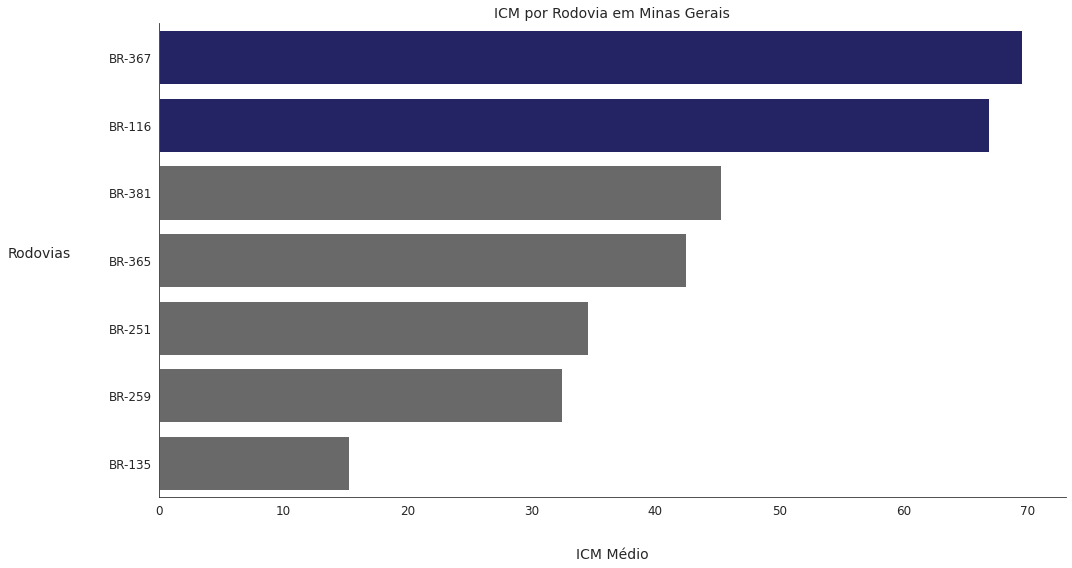

In [53]:
#Gráfico de Barra Horizontal
plt.figure(figsize=(15,8)) #Tamanho do gráfico
sns.set_style('white') #Estilo do gráfico
sns.barplot(data = EstadoMG, x='ICM', y='Rodovia', palette=[('midnightblue' if i >= 50 else 'dimgray') for i in EstadoMG['ICM']]) #Quais dados plotar no gráfico
plt.xlabel('ICM Médio', size=14,labelpad=30) #Eixo X Rótulo / Título do Eixo
plt.ylabel('Rodovias', size=14,rotation=0,labelpad=70) #Eixo Y Rótulo / Título do Eixo
plt.title('ICM por Rodovia em Minas Gerais', size=14) #Título
plt.tick_params(axis='both', which='major', labelsize=12) #Eixo X e Y dos dados formatação
sns.despine() #Tirar Linha do topo e direita do gráfico
plt.tight_layout() #Melhorar Visualização

In [18]:
Estados = dfpavimentacao.groupby(['UF']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
Estados


,UF,ICM
8,MG,51.159910
21,SE,50.770883
0,AC,44.850410
2,AM,44.647583
20,SC,41.253292
7,MA,40.967703
15,PR,39.531007
3,AP,33.567805
18,RR,32.943346
4,BA,32.364397


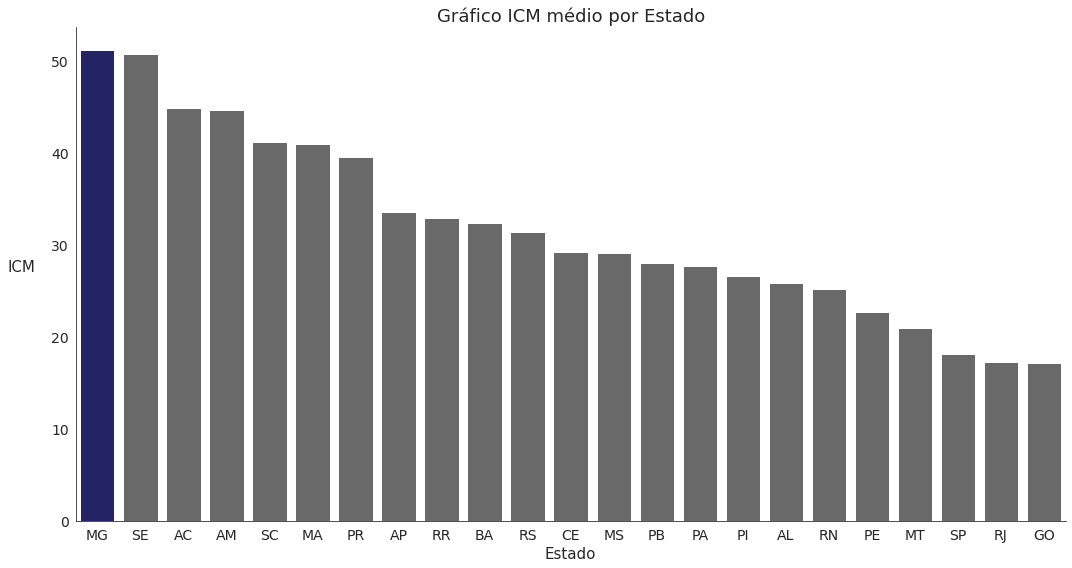

In [54]:
#Gráfico Média ICM por Estado
plt.figure(figsize=(15,8))
sns.set_style('white')
sns.barplot(data=Estados,x='UF', y='ICM',palette = [('midnightblue' if i == 'MG' else 'dimgray') for i in Estados['UF']])
plt.xlabel("Estado", size=15)
plt.ylabel("ICM", size=15,rotation=0,labelpad=30)
plt.title("Gráfico ICM médio por Estado", size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
sns.despine()
plt.tight_layout()

In [20]:
#Gráfico Média ICM por Estado
#plt.figure(figsize=(15,8))
#sns.set_style('white')
#sns.barplot(data=dfpavimentacao,x='UF', y='ICM',palette=sns.color_palette("ch:s=.25,rot=-.25"))
#plt.xlabel("Estado", size=15)
#plt.ylabel("ICM", size=15,rotation=0,labelpad=30)
#plt.title("Gráfico ICM médio por Estado", size=18)
#plt.tick_params(axis='both', which='major', labelsize=14)
#sns.despine()
#plt.tight_layout()


In [21]:
#Filtro de Classificação das Rodovias pelas Categorias do DNIT
RodoviaClassificacao = dfpavimentacao.groupby(['Rodovia']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
condicoes =[(RodoviaClassificacao['ICM'] > 70),
    ((50 < RodoviaClassificacao['ICM']) & (RodoviaClassificacao['ICM'] <= 70)),
    ((30 < RodoviaClassificacao['ICM']) & (RodoviaClassificacao['ICM'] <= 50)),
    (RodoviaClassificacao['ICM'] <= 30)]
opcao = ['Péssimo','Ruim','Regular','Bom'] 
RodoviaClassificacao['Classificação'] = np.select(condicoes,opcao)
Bom = RodoviaClassificacao.query("Classificação == 'Bom'")
Regular = RodoviaClassificacao.query("Classificação == 'Regular'")
Ruim = RodoviaClassificacao.query("Classificação == 'Ruim'")
Pessimo = RodoviaClassificacao.query("Classificação == 'Péssimo'")

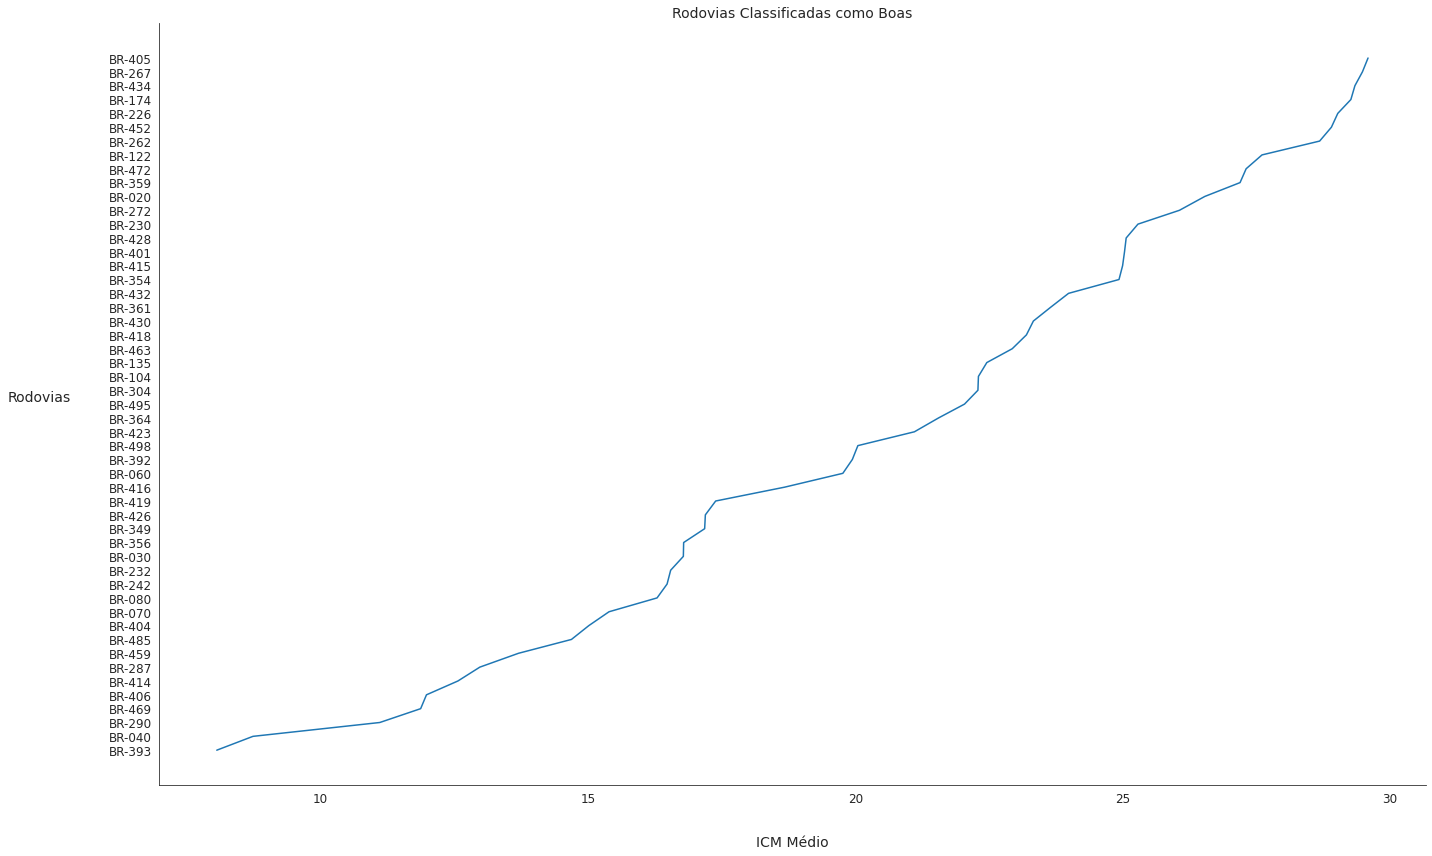

In [22]:
#Gráfico de Barra Rodovias Boas
plt.figure(figsize=(20,12))
sns.set_style('white')
sns.lineplot(data = Bom, x='ICM', y='Rodovia', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.xlabel('ICM Médio', size=14,labelpad=30)
plt.ylabel('Rodovias', size=14,rotation=0,labelpad=70)
plt.title('Rodovias Classificadas como Boas', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()

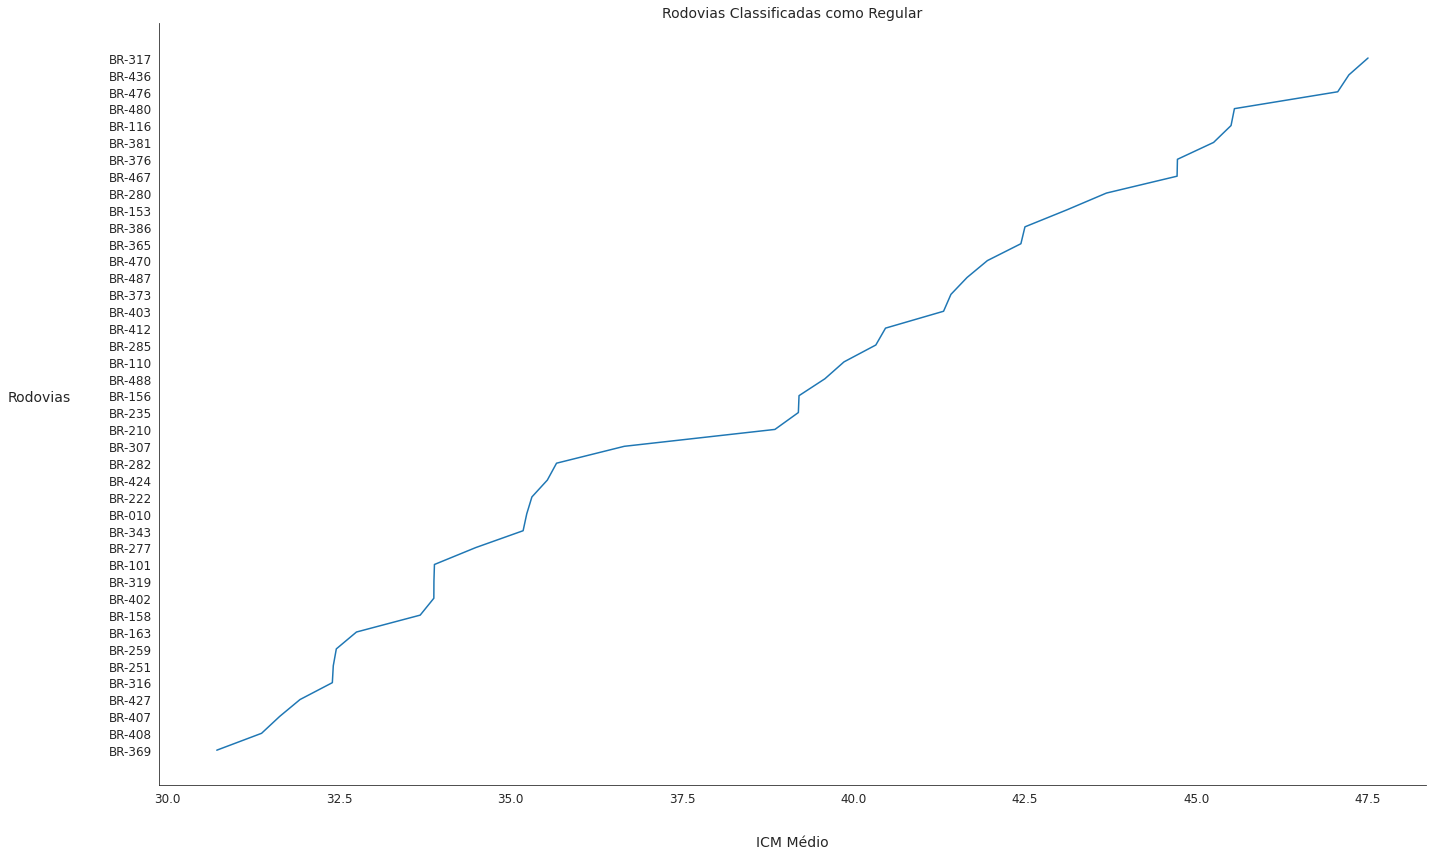

In [23]:
#Gráfico de Barra Rodovias Regular
plt.figure(figsize=(20,12))
sns.set_style('white')
sns.lineplot(data = Regular, x='ICM', y='Rodovia', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.xlabel('ICM Médio', size=14,labelpad=30)
plt.ylabel('Rodovias', size=14,rotation=0,labelpad=70)
plt.title('Rodovias Classificadas como Regular', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()

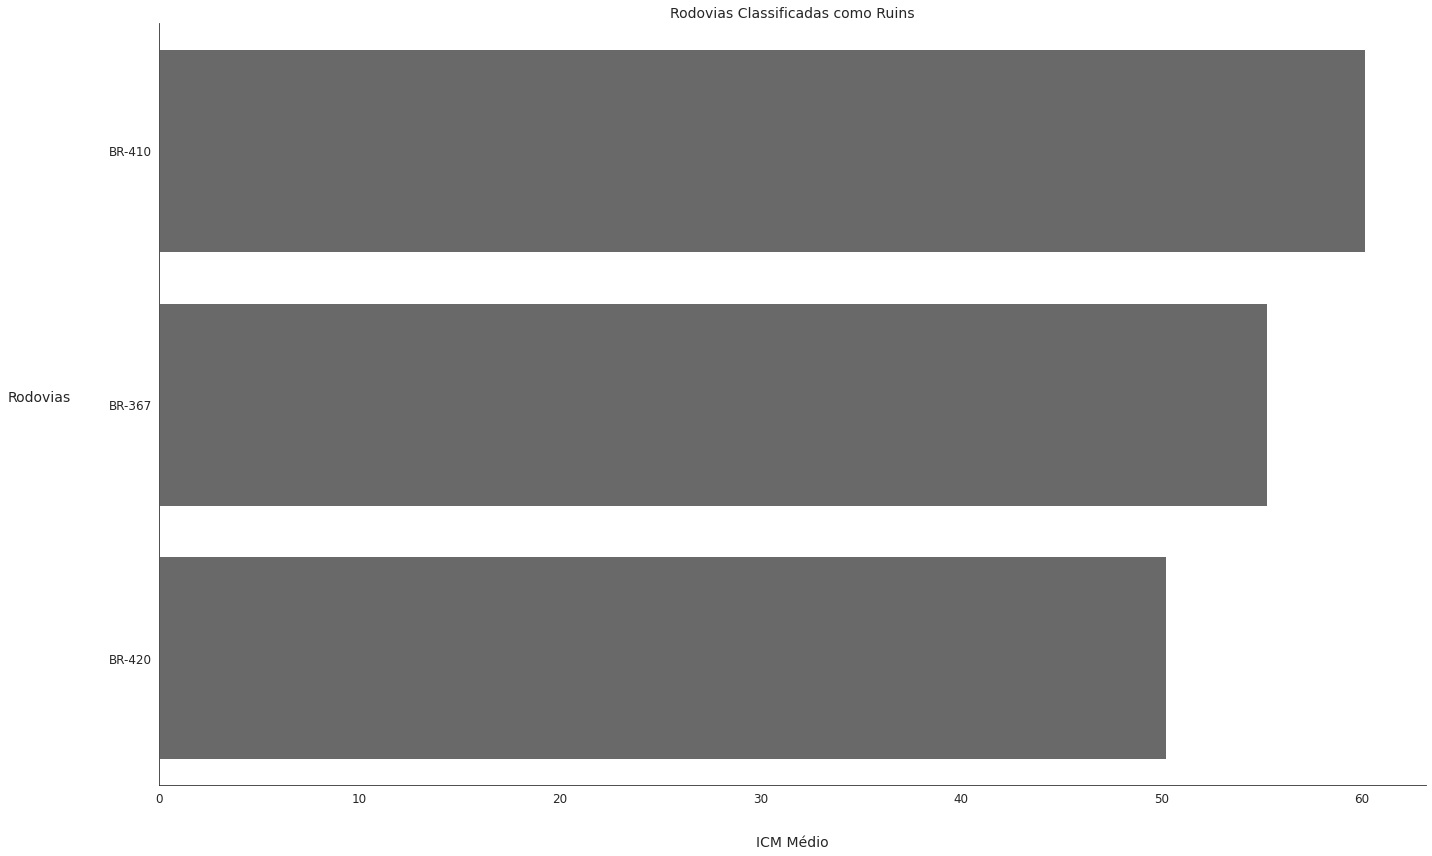

In [55]:
#Gráfico de Barra Rodovias Ruins
plt.figure(figsize=(20,12))
sns.set_style('white')
sns.barplot(data = Ruim, x='ICM', y='Rodovia', color='dimgray')
plt.xlabel('ICM Médio', size=14,labelpad=30)
plt.ylabel('Rodovias', size=14,rotation=0,labelpad=70)
plt.title('Rodovias Classificadas como Ruins', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()

In [25]:
#Filtro dos Trechos classificados como Péssimos por Rodovia
Pessimo = dfpavimentacao.query("ICM > 70")
Pessimo = Pessimo.groupby(['Rodovia']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
Pessimo


,Rodovia,ICM
25,BR-282,90.168367
14,BR-210,89.053191
34,BR-367,88.562500
11,BR-158,87.052239
7,BR-122,85.828125
19,BR-251,85.750000
56,BR-470,84.007812
50,BR-424,83.375000
13,BR-174,83.214474
44,BR-408,83.125000


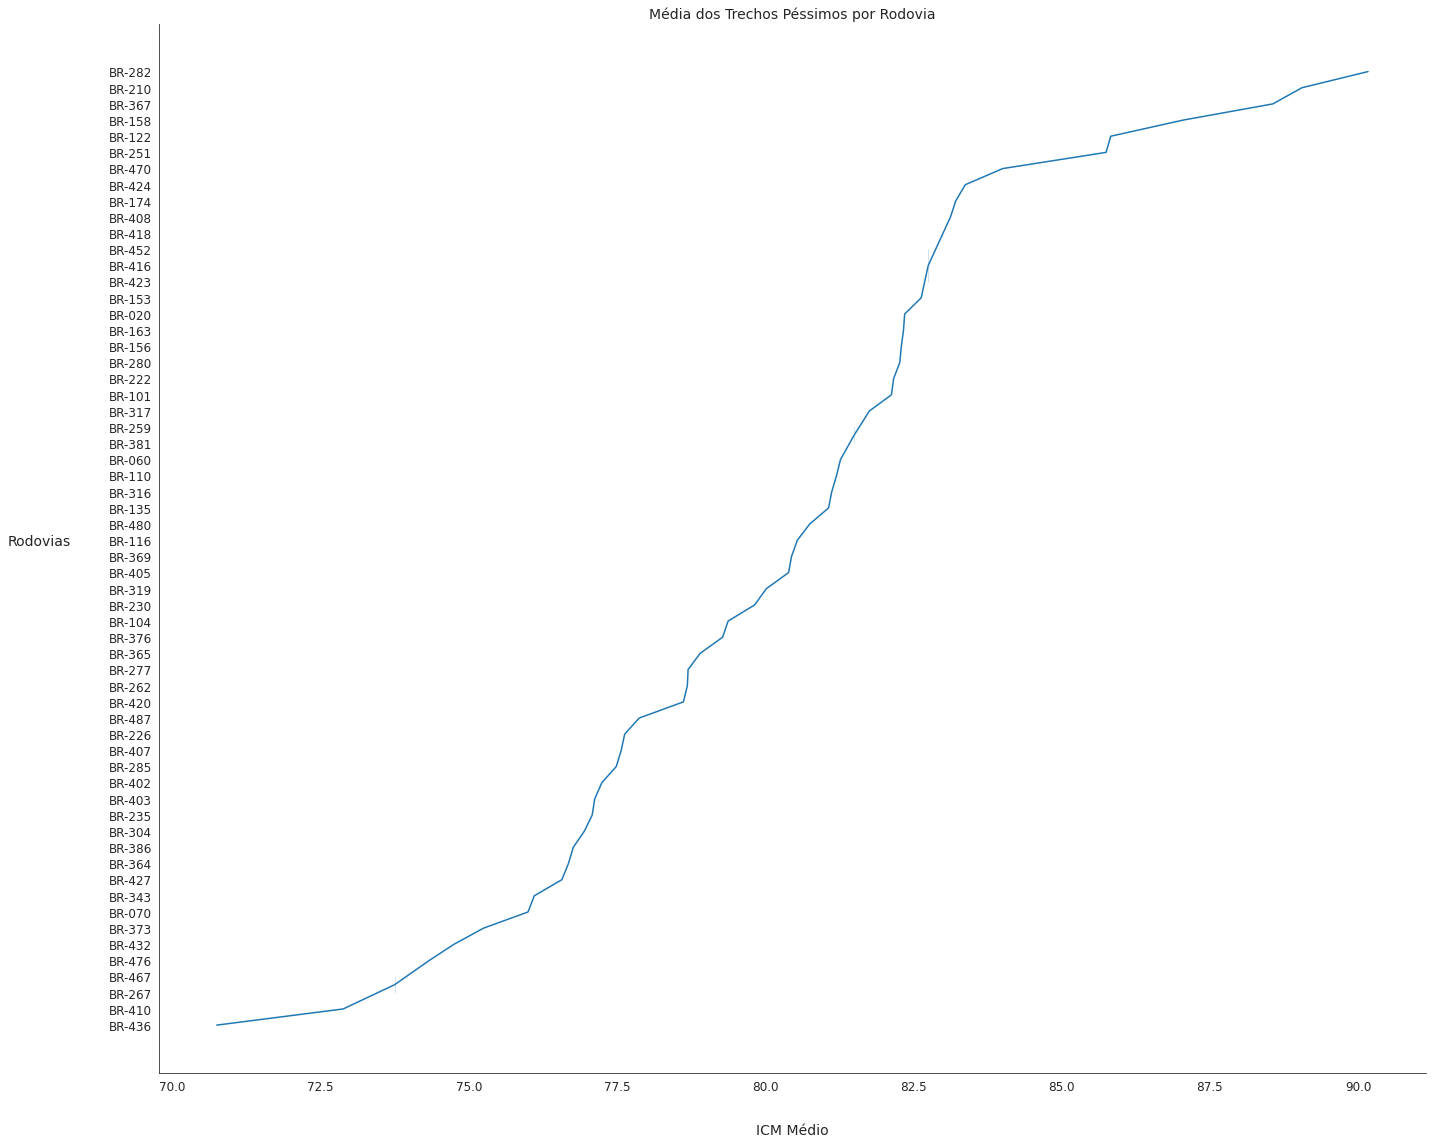

In [26]:
#Gráfico de Barra Rodovias Péssimos
plt.figure(figsize=(20,16))
sns.set_style('white')
sns.lineplot(data = Pessimo, x='ICM', y='Rodovia', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.xlabel('ICM Médio', size=14,labelpad=30)
plt.ylabel('Rodovias', size=14,rotation=0,labelpad=70)
plt.title('Média dos Trechos Péssimos por Rodovia', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()

In [27]:
#Filtro dos Trechos classificados como Péssimos
Pessimo = dfpavimentacao.query("ICM > 70")
Pessimo = Pessimo.groupby(['UF']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
Pessimo

,UF,ICM
19,SC,86.738542
8,MG,85.176163
17,RR,84.742000
2,AM,83.627301
20,SE,83.525510
6,GO,82.750000
3,AP,82.296296
12,PB,82.271739
7,MA,82.209559
13,PE,81.682692


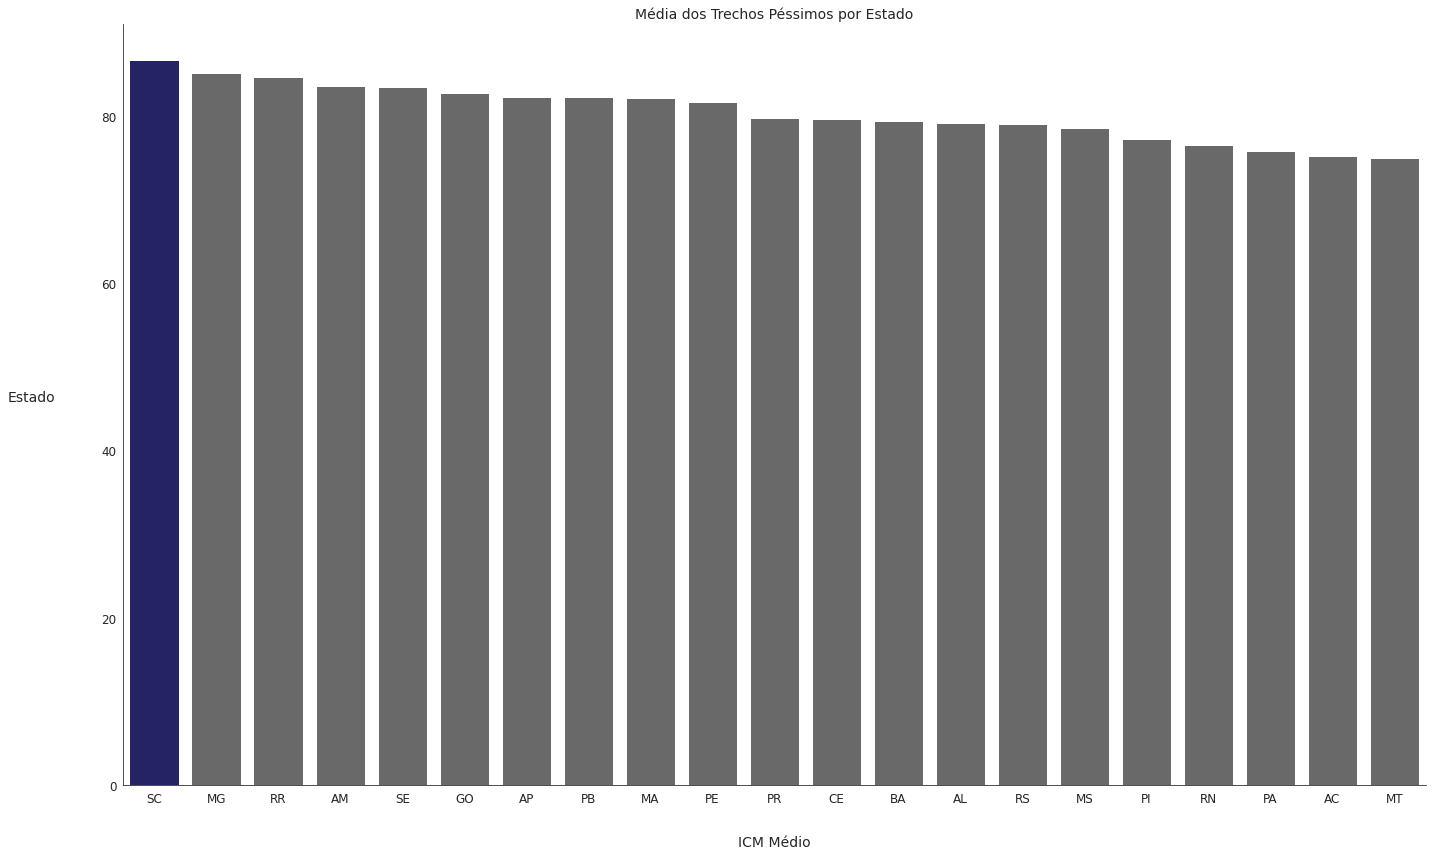

In [56]:
#Gráfico Pessimo por Estado - Não teve nehuma rodovia classificada como Péssima, mas há trechos classificados assim
plt.figure(figsize=(20,12))
sns.set_style('white')
sns.barplot(data = Pessimo, x='UF', y='ICM', palette = [('midnightblue' if i == 'MG' else 'dimgray') for i in Estados['UF']])
plt.xlabel('ICM Médio', size=14,labelpad=30)
plt.ylabel('Estado', size=14,rotation=0,labelpad=70)
plt.title('Média dos Trechos Péssimos por Estado', size=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()


In [29]:
#Quantidade de itens avaliados por classificação
Quantidade = dfpavimentacao.groupby(['Classificação']).count()
Quantidade

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
Classificação,,,,,,,,,,,
Bom,22481,22481,22481,22481,22481,22481,22481,22481,22481,22481,22481
Péssimo,3149,3149,3149,3149,3149,3149,3149,3149,3149,3149,3149
Regular,10518,10518,10518,10518,10518,10518,10518,10518,10518,10518,10518
Ruim,3638,3638,3638,3638,3638,3638,3638,3638,3638,3638,3638


In [30]:
#Quantidade de Extensão em km de cada avaliação
Extensao = dfpavimentacao
Extensao['Extensão (km)']
Extensao['Extensão (km)'] = Extensao['Extensão (km)'].str.replace(',','.')
Extensao['Extensão (km)'] = Extensao['Extensão (km)'].astype(float)


In [31]:
#Limpando outlines
#Extensao = Extensao.drop(Extensao['Extensão (km)'].idxmin())
Extensao['Extensão (km)'].describe()

count    39786.000000
mean         1.379721
std         54.705166
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       8172.000000
Name: Extensão (km), dtype: float64

In [32]:
#Filtrando dados das Rodovias
TodasRodovias = dfpavimentacao.groupby(['Rodovia']).agg({'ICM':'mean'}).reset_index().sort_values(['ICM'],ascending=False)
TodasRodovias


,Rodovia,ICM
65,BR-410,60.159722
49,BR-367,55.281174
72,BR-420,50.197581
39,BR-317,47.501453
81,BR-436,47.222222
...,...,...
62,BR-406,11.983425
86,BR-469,11.875000
35,BR-290,11.110526
3,BR-040,8.739583


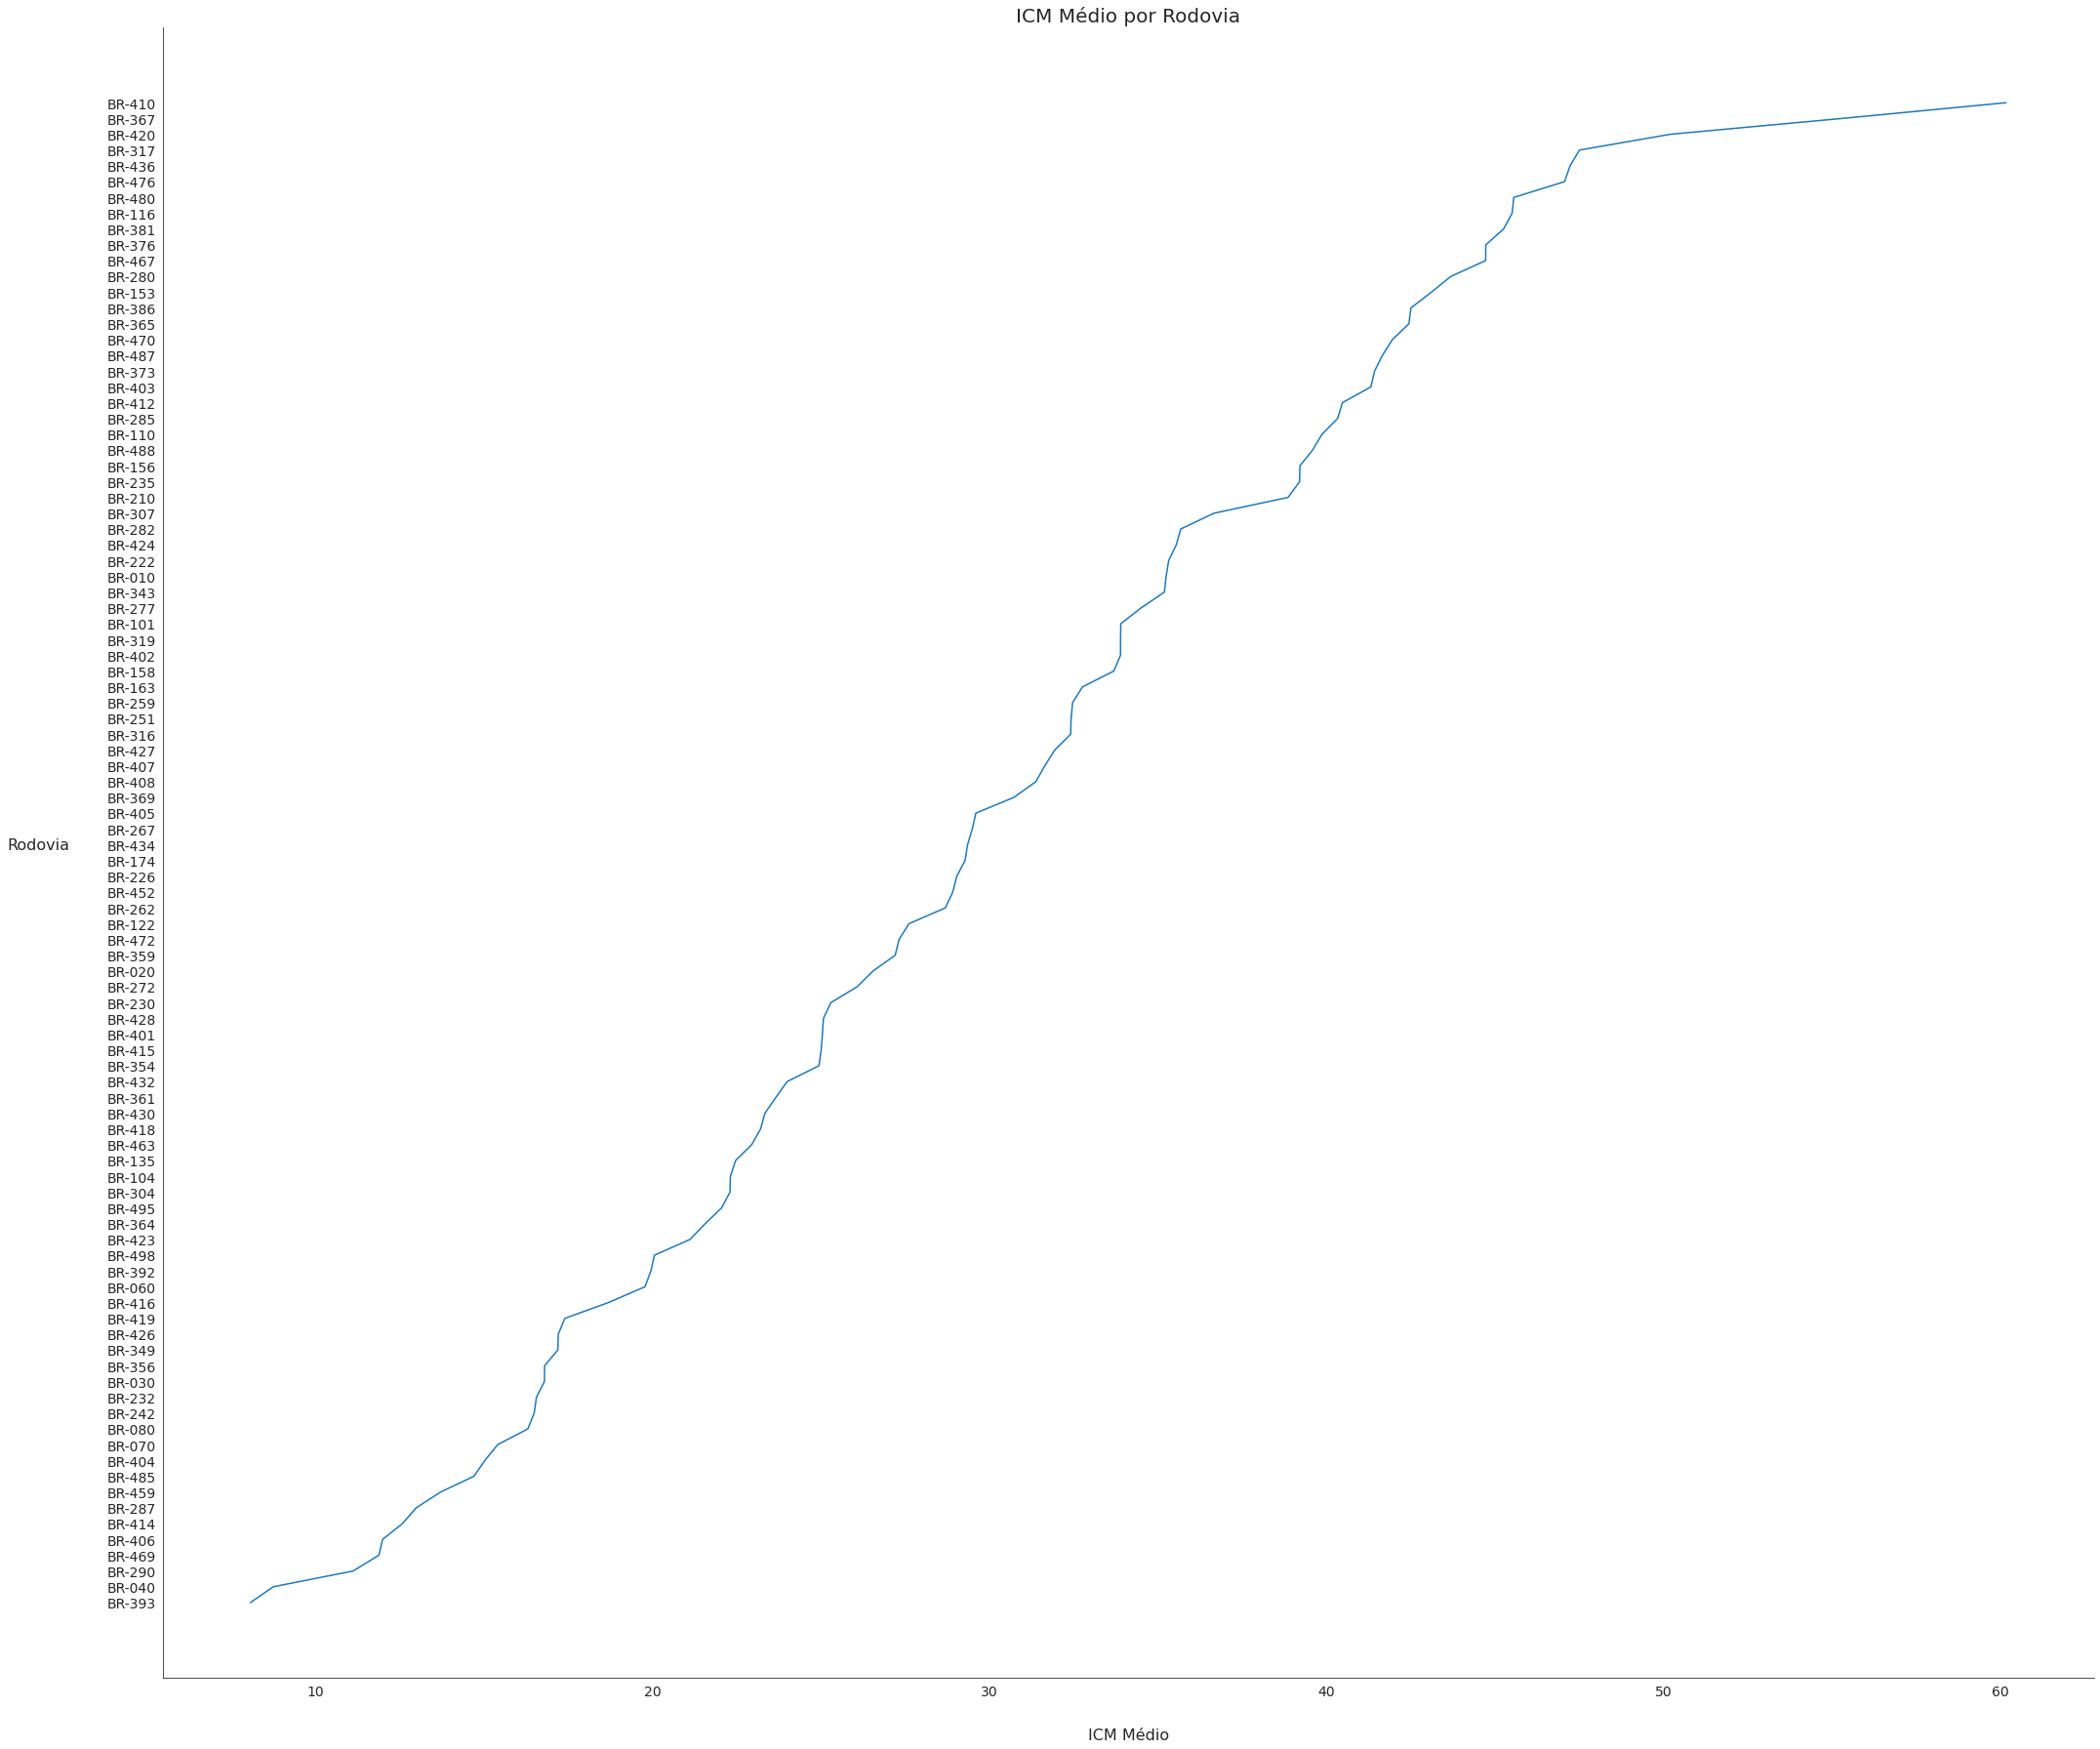

In [33]:
#Gráfico de Todas Rodovias
plt.figure(figsize=(30,25))
sns.set_style('white')
sns.lineplot(data = TodasRodovias, x='ICM', y='Rodovia', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.xlabel('ICM Médio', size=16,labelpad=30)
plt.ylabel('Rodovia', size=16,rotation=0,labelpad=70)
plt.title('ICM Médio por Rodovia', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
sns.despine()
plt.tight_layout()